In [73]:
import numpy as np

project_path = '/home/sasce/Downloads/SoftwareTopics/data/raw/astrixdb-graph.json'

In [74]:
import json

content = json.load(open(project_path, 'r'))


In [75]:
files = content['versions'][0]['files']
filenames = [file for file in files]
codes = [files[file]['identifiers'] for file in filenames]
distributions = [files[file]['annotation']['distribution'] for file in filenames]

In [76]:
taxonomy = {int(k): v for k, v in content['taxonomy'].items()}

In [77]:

labels = [np.argmax(distribution) for distribution in distributions]

In [78]:
codes = [" ".join(code) for code in codes]

In [79]:
import re
def split_camelcase(text: str):
    return re.sub(
        '([A-Z][a-z]+)|_', r' \1', re.sub('([A-Z]+)', r' \1', text)
    ).split()


In [80]:
codes_split = [split_camelcase(code) for code in codes]
codes_split = [" ".join(code) for code in codes_split]

In [81]:
codes_split[0]

'org apache asterix graphix test java io File java util Array List java util Collection java util Collections org apache asterix test common Test Executor org apache asterix test runtime Execution Test Util org apache asterix testframework context Test Case Context org apache asterix testframework xml Test Group org apache hyracks util file File Util org junit After Class org junit Before Class org junit Test org junit runner Run With org junit runners Parameterized org junit runners Parameterized Parameters Run With Parameterized Sqlpp Execution Test String PATH ACTUAL File Util join Path String PATH BASE File Util join Path String TEST SUITE FILE String ONLY SUITE FILE String FILE TEST CONFIG File Util join Path Graphix Integration Util integration Util Graphix Integration Util Test Executor test Executor Test Executor Test Group Failed Group Test Case Context tc Ctx Sqlpp Execution Test Test Case Context tc Ctx tc Ctx tc Ctx Before Class set Up Exception File PATH ACTUAL mkdirs Exec

In [82]:
from sentence_transformers import SentenceTransformer

# Pre-calculate embeddings
embedding_model = SentenceTransformer("BAAI/bge-small-en-v1.5")


In [83]:
embeddings = embedding_model.encode(codes, show_progress_bar=True)

Batches:   0%|          | 0/5 [00:00<?, ?it/s]

In [84]:
embeddings_split = embedding_model.encode(codes_split, show_progress_bar=True)

Batches:   0%|          | 0/5 [00:00<?, ?it/s]

In [85]:
from umap import UMAP
from hdbscan import HDBSCAN

umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=150, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [86]:
# Pre-reduce embeddings for visualization purposes
reduced_embeddings = UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine', random_state=42).fit(embeddings)
reduced_embeddings_split = UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine', random_state=42).fit(embeddings_split)

/home/sasce/anaconda3/envs/SoftwareTopics/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/sasce/anaconda3/envs/SoftwareTopics/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [91]:
type(embeddings)

numpy.ndarray

<Axes: >

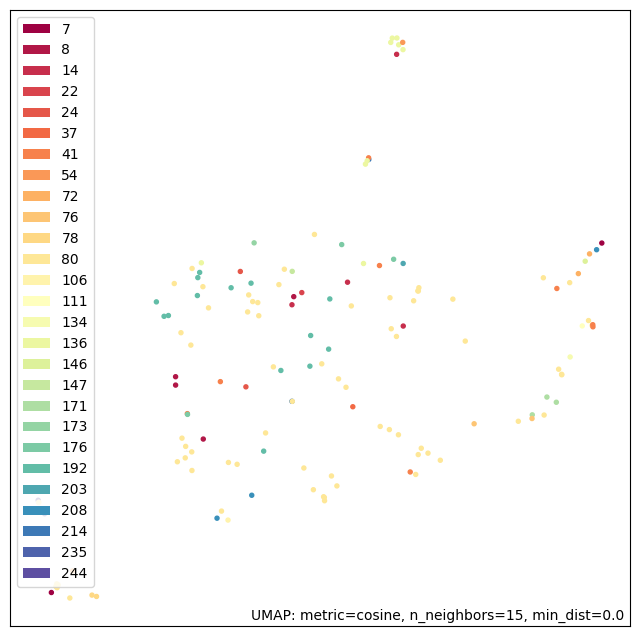

In [88]:
import umap.plot
umap.plot.points(reduced_embeddings, labels=np.array(labels))

<Axes: >

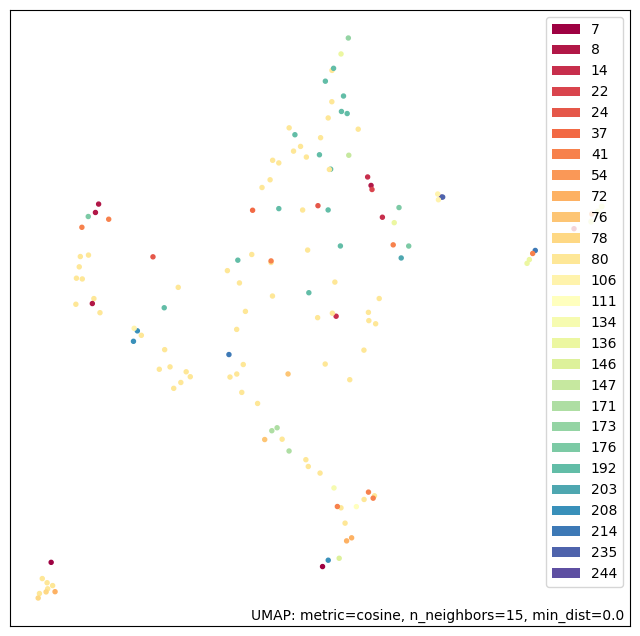

In [89]:

umap.plot.points(reduced_embeddings_split, labels=np.array(labels))